In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
# Size for images using InceptionV3

img_height = 299
img_width = 299

# Set the batch size

batch_size = 32

# Set the images directorys

train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Images Preprocessing

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1120 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


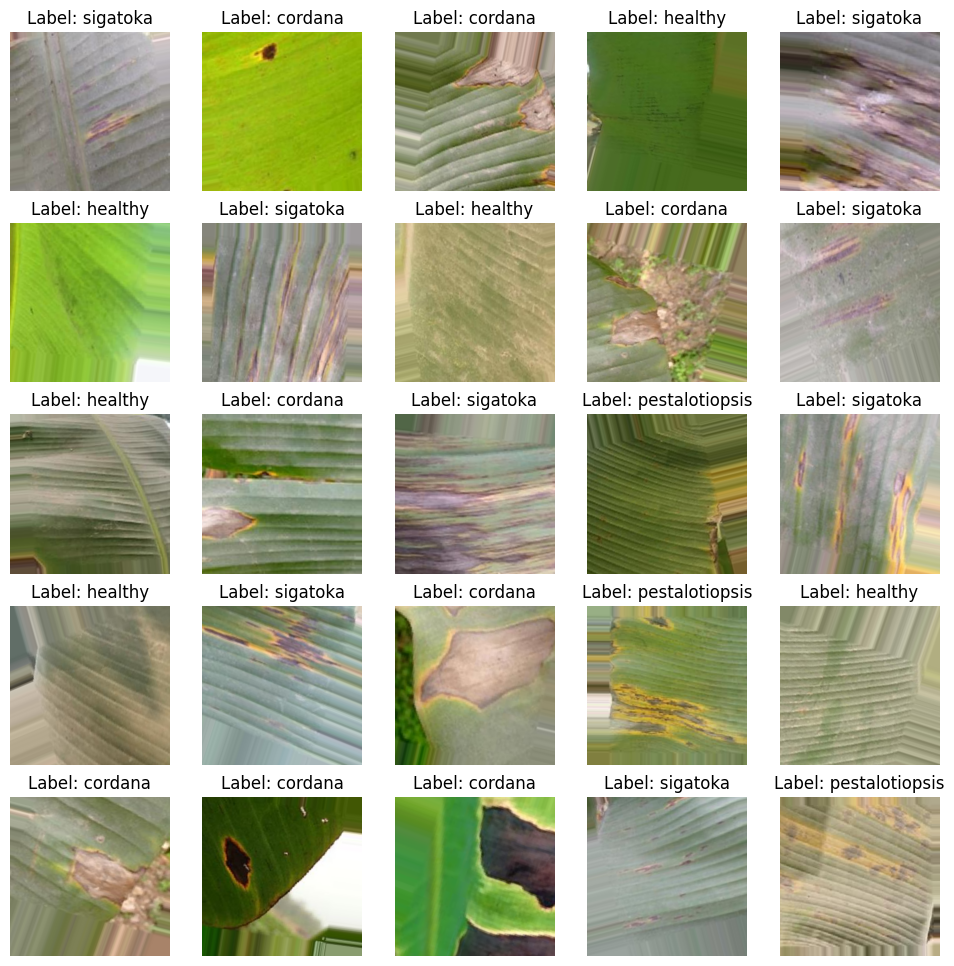

In [3]:
# Get a dictionary of classes (name -> index)
class_labels = train_generator.class_indices

# Reset the dictionary to get the index of the class
class_labels = {v: k for k, v in class_labels.items()}

# Get a batch of images and labels
images, labels = next(train_generator)

# Show the images and labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = labels[i].argmax()  
    plt.title(f'Label: {class_labels[label_index]}')
plt.show()

In [4]:
# Load InceptionV3 model

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
model_inception = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

# Freeze the base model

base_model_inception.trainable = False

In [6]:
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_inception.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,066,084 (84.18 MB)

 Trainable params: 263,044 (1.00 MB)

 Non-trainable params: 21,803,040 (83.17 MB)

In [7]:
history_inception = model_inception.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=50)

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.6332 - loss: 1.0592 - val_accuracy: 0.7000 - val_loss: 0.8127
Epoch 2/50


C:\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9063 - loss: 0.2629 - val_accuracy: 0.8875 - val_loss: 0.2985
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9309 - loss: 0.2063 - val_accuracy: 0.9312 - val_loss: 0.1952
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9392 - loss: 0.1882 - val_accuracy: 0.9625 - val_loss: 0.1244
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9441 - loss: 0.1681 - val_accuracy: 0.9438 - val_loss: 0.1953
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s

In [8]:
val_loss, val_accuracy = model_inception.evaluate(valid_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9248 - loss: 0.1333
Validation accuracy: 0.94


Found 320 images belonging to 4 classes.


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


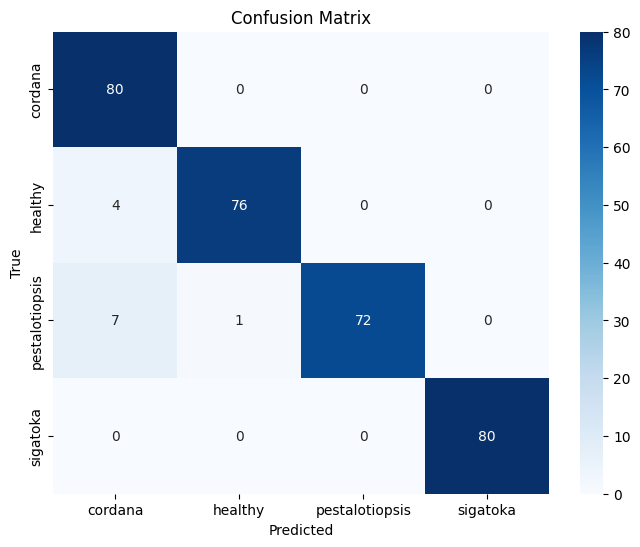

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta a tus datos
test_dir = '../data/test'

# Preprocesamiento del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para obtener las etiquetas en el mismo orden
)

# Obtener las predicciones del modelo
predictions = model_inception.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
